In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [6]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/bipedal-bin_goal/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/bipedal-bin_goal/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,ActionsAdvantageMean,ActionsClipFrac,ActionsEntropy,ActionsKL,ActionsReward,ActionsStopIter,ActionsVVals,AverageEpRet,Condition1,Condition2,...,LossGoalInverse,LossGoalsPi,LossGoalsV,Performance,StabilityActionError,StabilityGoalError,StabilityReward,StdEpRet,TotalEnvInteracts,Unit
0,0.474474,0.28725,3.733202,0.018000,0.549314,8.0,0.220703,-90.775160,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.260426,-0.206209,93.588910,-90.775160,0.491611,0.351562,0.549221,24.346365,4000,0
1,-0.312898,0.30375,3.702688,0.020356,0.575192,8.0,0.246964,-103.840860,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.257472,-0.205450,237.120290,-103.840860,0.343159,0.343141,0.574874,16.735407,8000,0
2,1.109139,0.18175,3.668786,0.015905,0.598146,12.0,-0.404924,-90.995514,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.255260,-0.205194,42.361202,-90.995514,0.373945,0.334957,0.597968,28.158123,12000,0
3,0.423669,0.21325,3.635609,0.016501,0.596512,11.0,0.385769,-93.093475,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.253494,-0.204089,24.152641,-93.093475,0.276511,0.341363,0.596284,25.119495,16000,0
4,0.312851,0.20800,3.666022,0.015342,0.600076,43.0,0.543491,-93.547960,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.252025,-0.203097,14.165756,-93.547960,0.398567,0.335430,0.600090,24.852583,20000,0
5,0.501994,0.36500,3.655798,0.023292,0.620574,8.0,-0.003757,-97.770920,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.252383,-0.203920,104.343300,-97.770920,0.222298,0.316859,0.620514,18.928915,24000,0
6,0.453210,0.14475,3.686138,0.016332,0.616036,23.0,0.377168,-88.944740,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.250920,-0.201967,8.908543,-88.944740,0.325293,0.328000,0.615987,26.709682,28000,0
7,0.496000,0.27575,3.693927,0.016983,0.613885,10.0,0.472865,-87.663445,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.250411,-0.200001,5.077814,-87.663445,0.260468,0.328789,0.613905,31.264353,32000,0
8,0.413362,0.26125,3.663891,0.017718,0.613297,14.0,0.515235,-85.257484,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.251162,-0.199352,3.249657,-85.257484,0.185348,0.333527,0.613185,34.011246,36000,0
9,0.388194,0.23125,3.683419,0.015548,0.614504,12.0,0.397659,-86.665810,reward_shift_bipedalwalker-v2,reward_shift_bipedalwalker-v2-0,...,0.250287,-0.200960,3.782604,-86.665810,0.348455,0.329004,0.614305,30.422039,40000,0


In [7]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,reward_shift_bipedalwalker-v2,4000


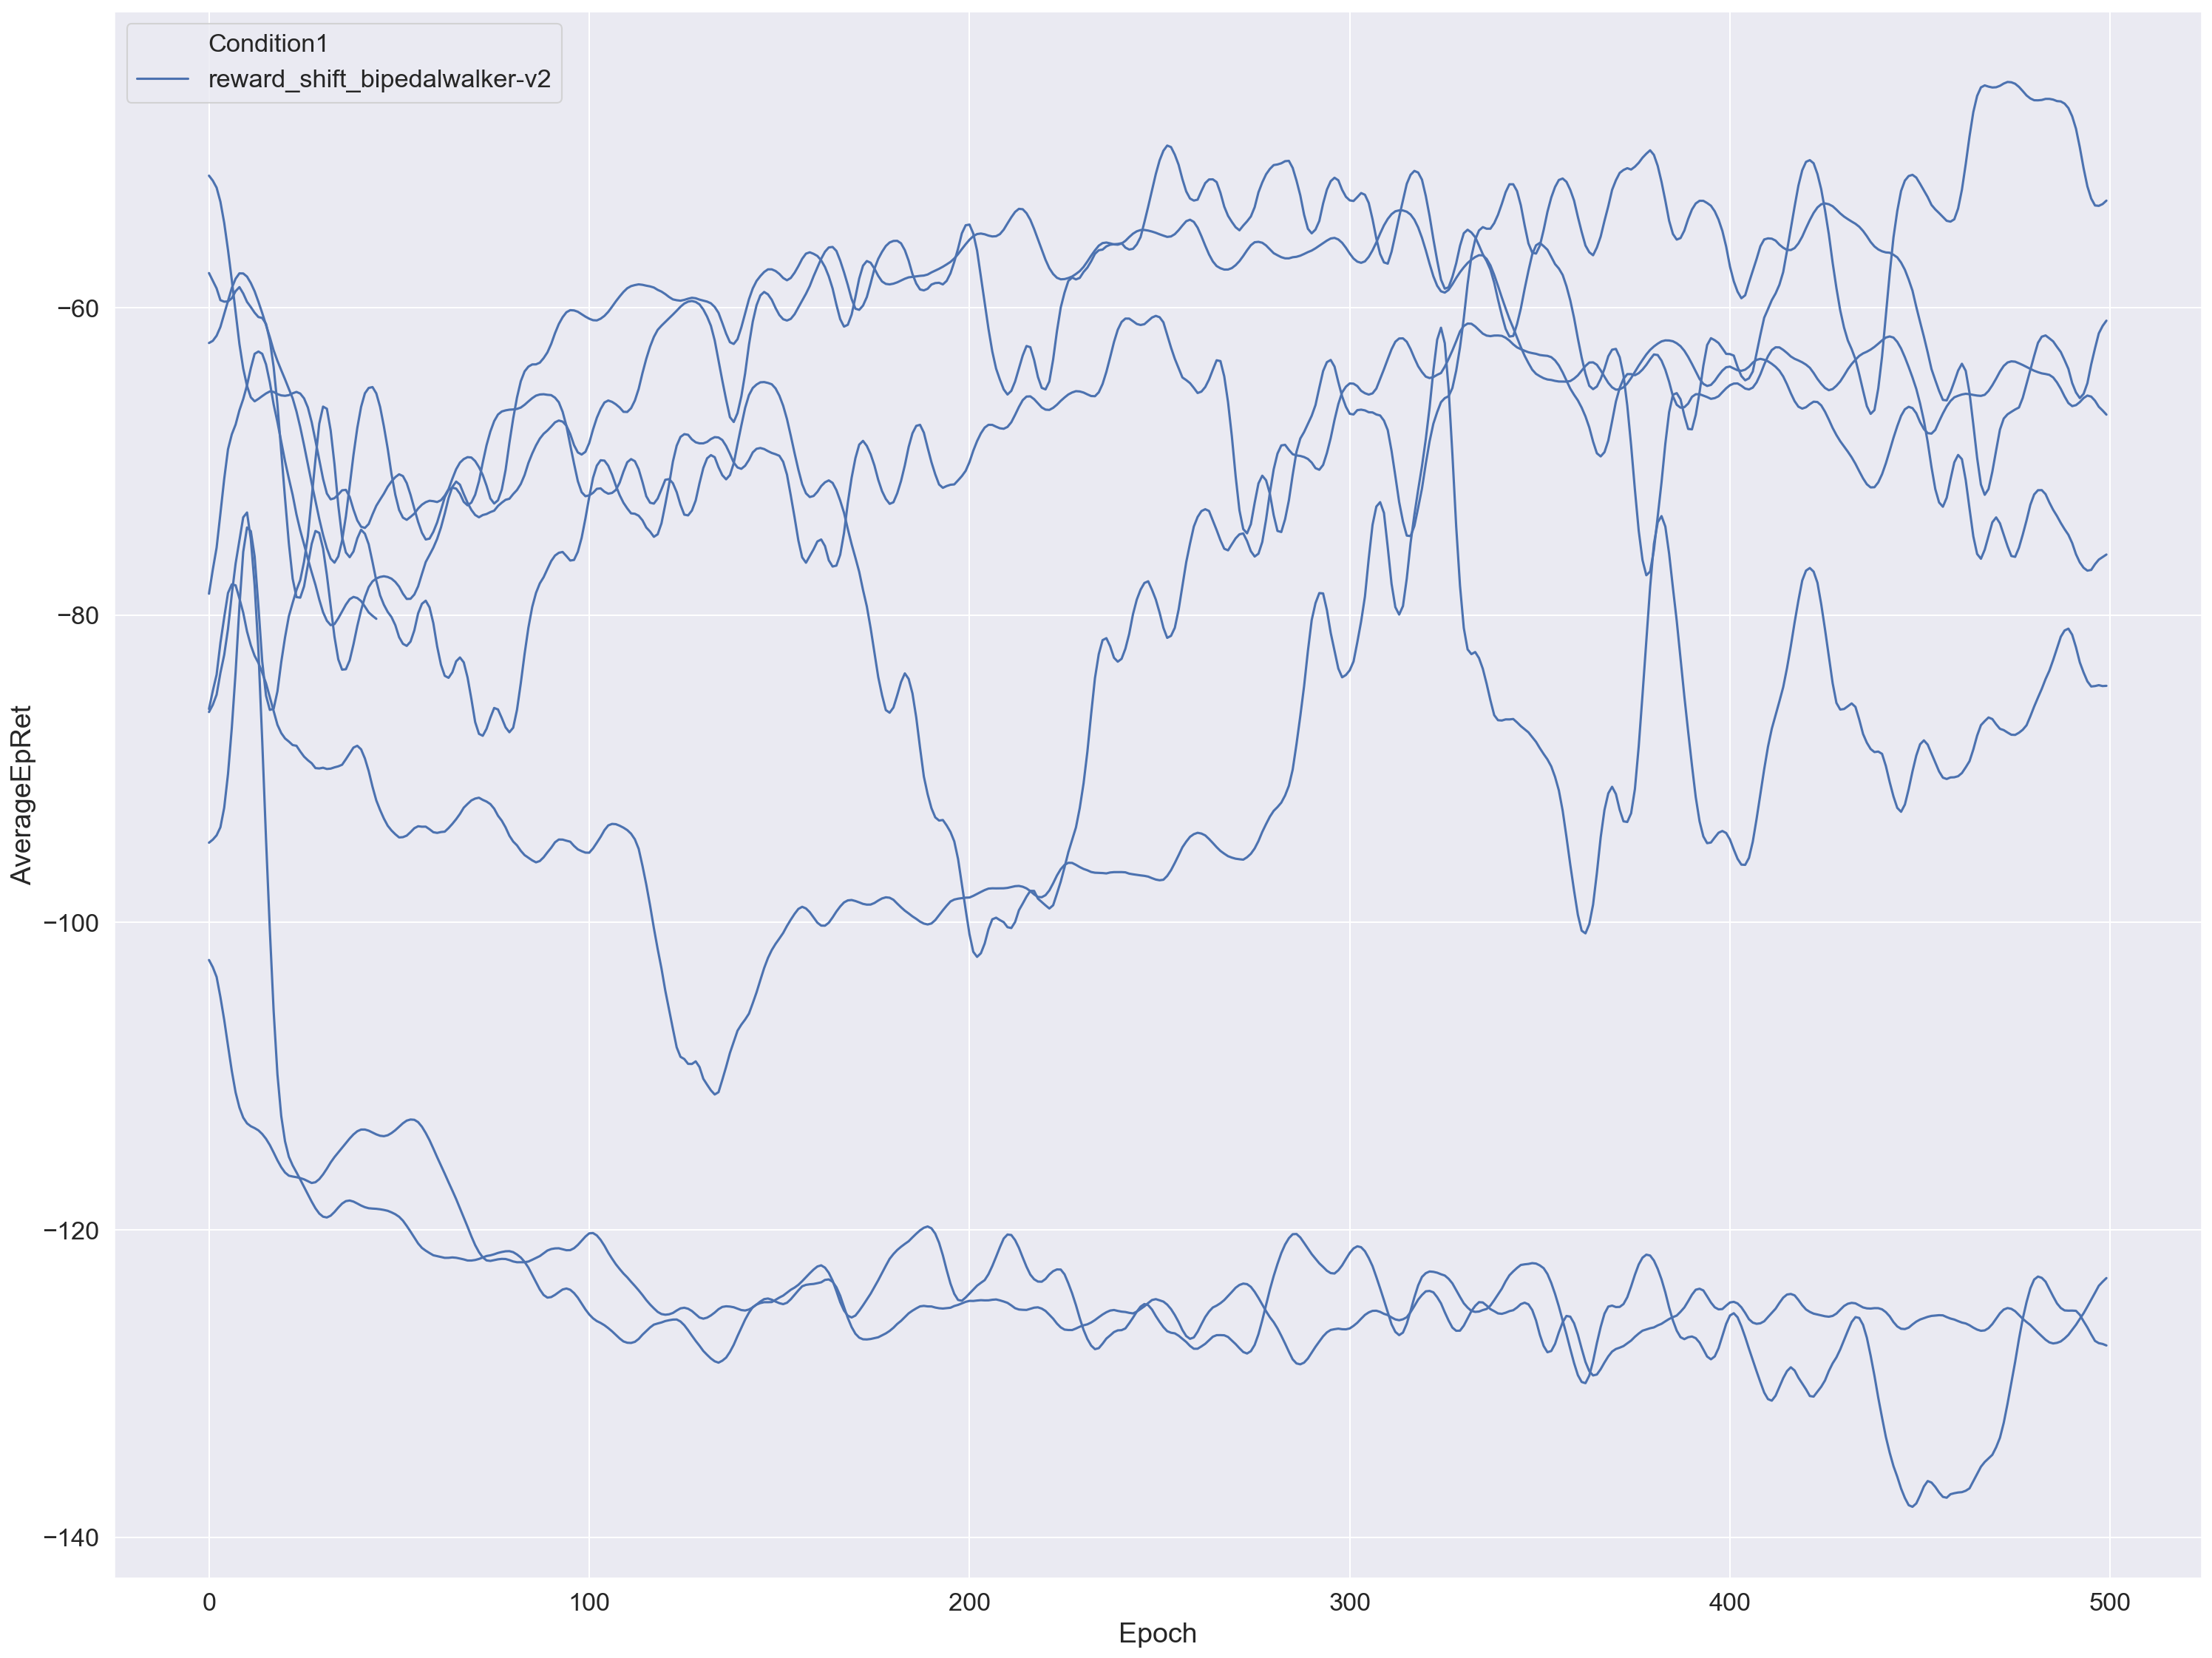

In [16]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, units='Condition2', estimator=None)
plt.show()

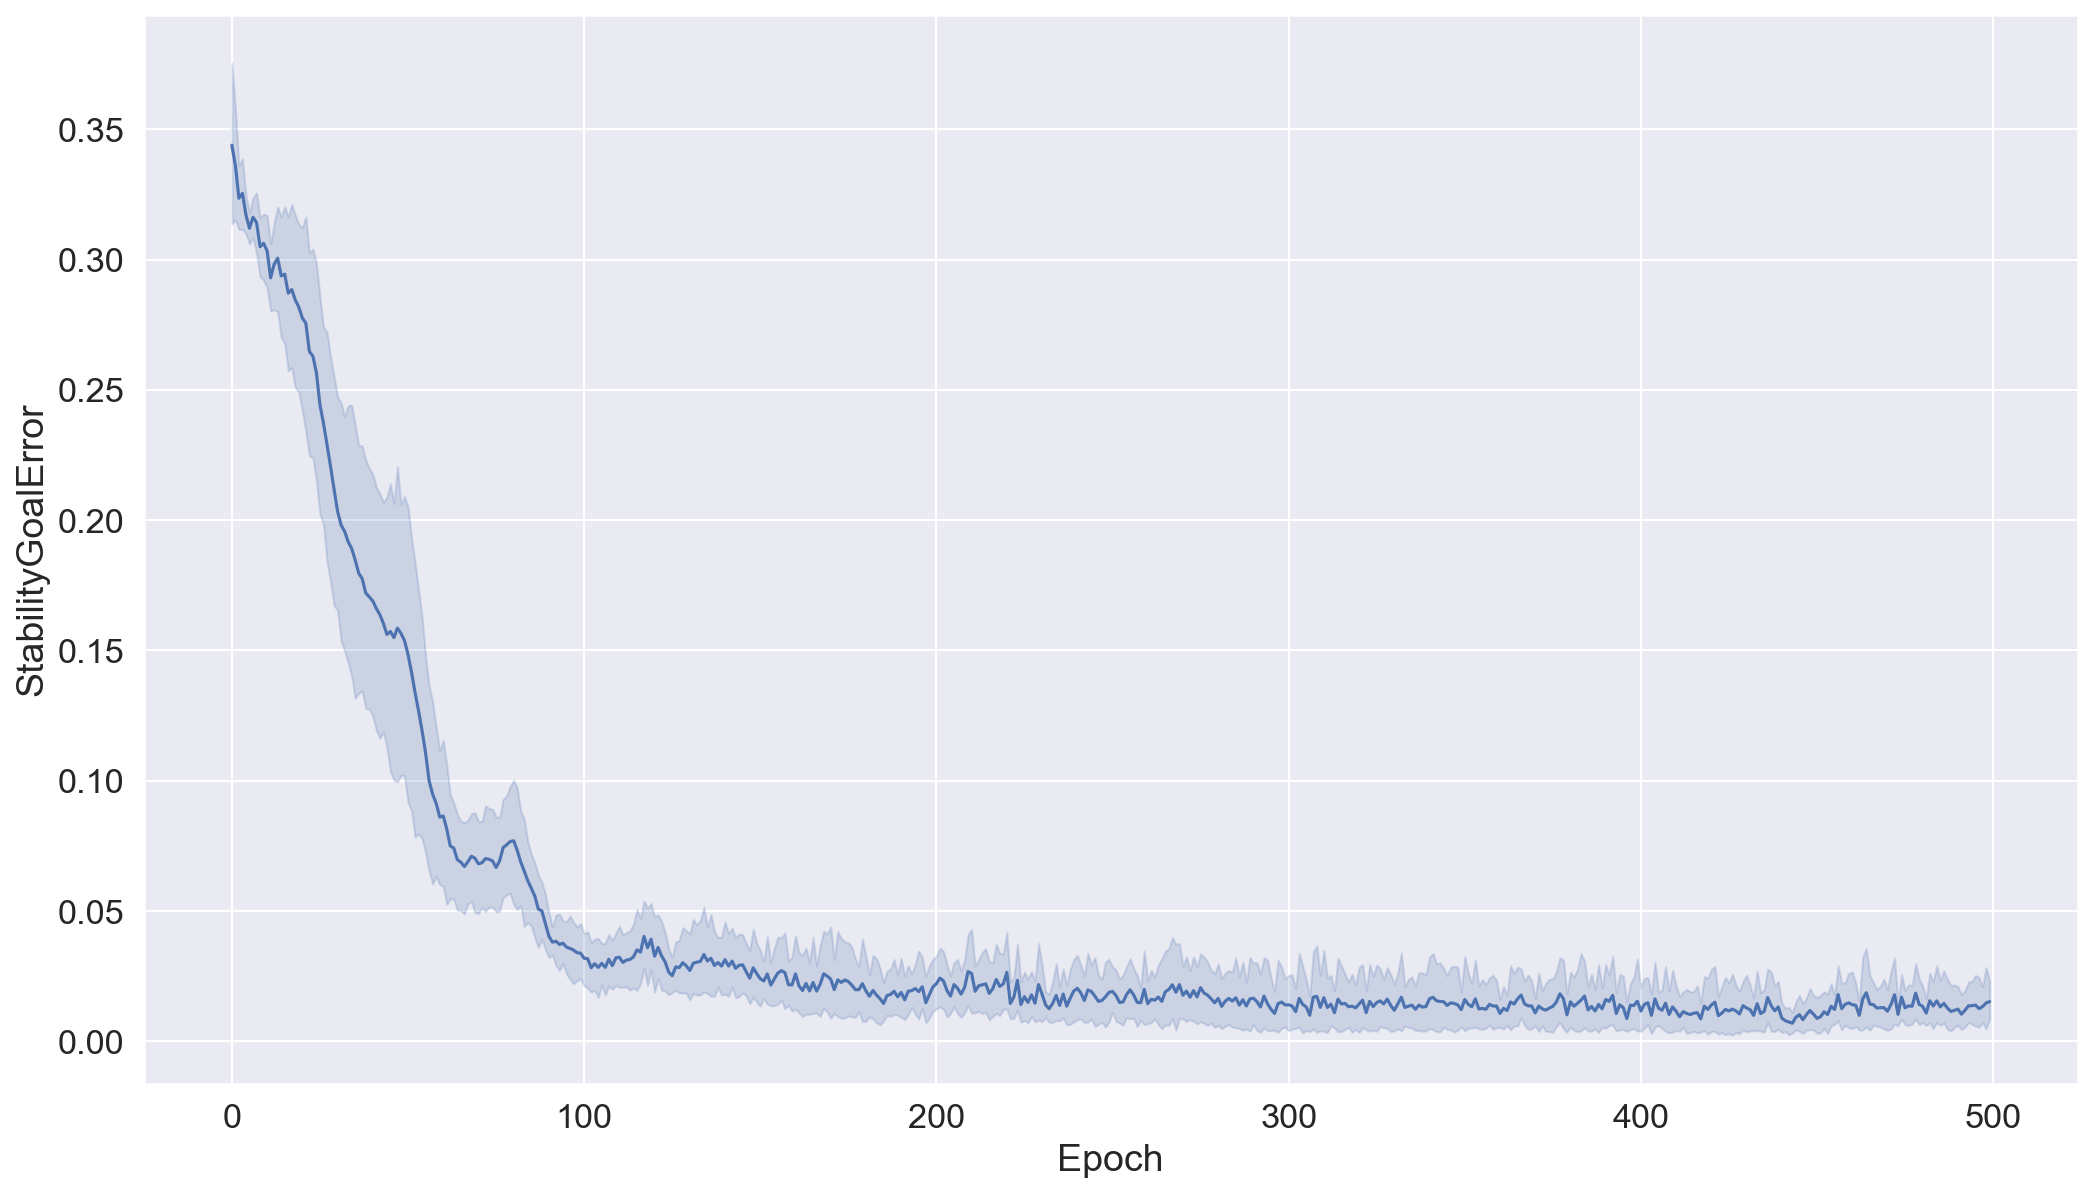

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

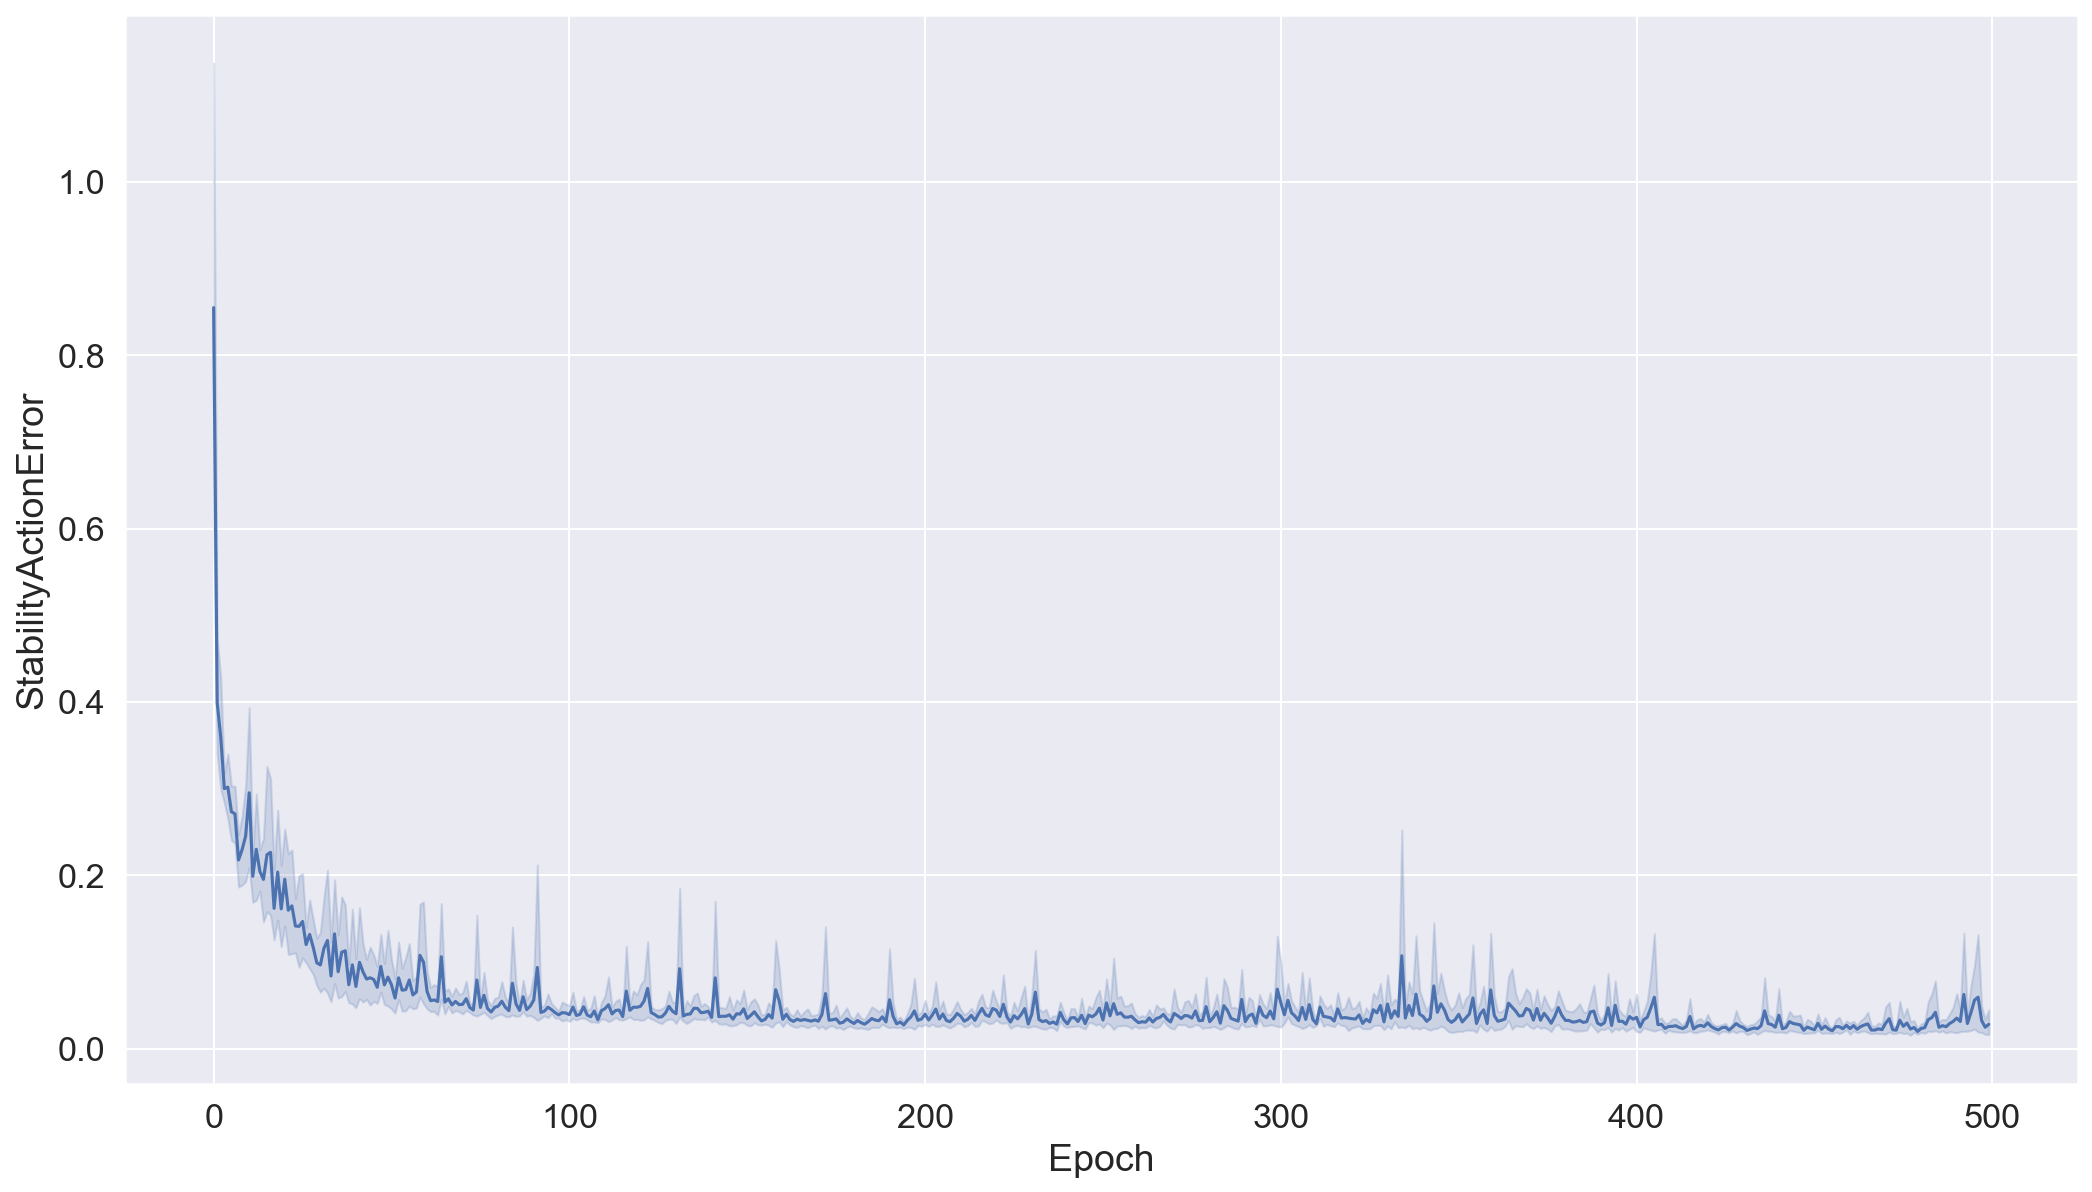

In [10]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

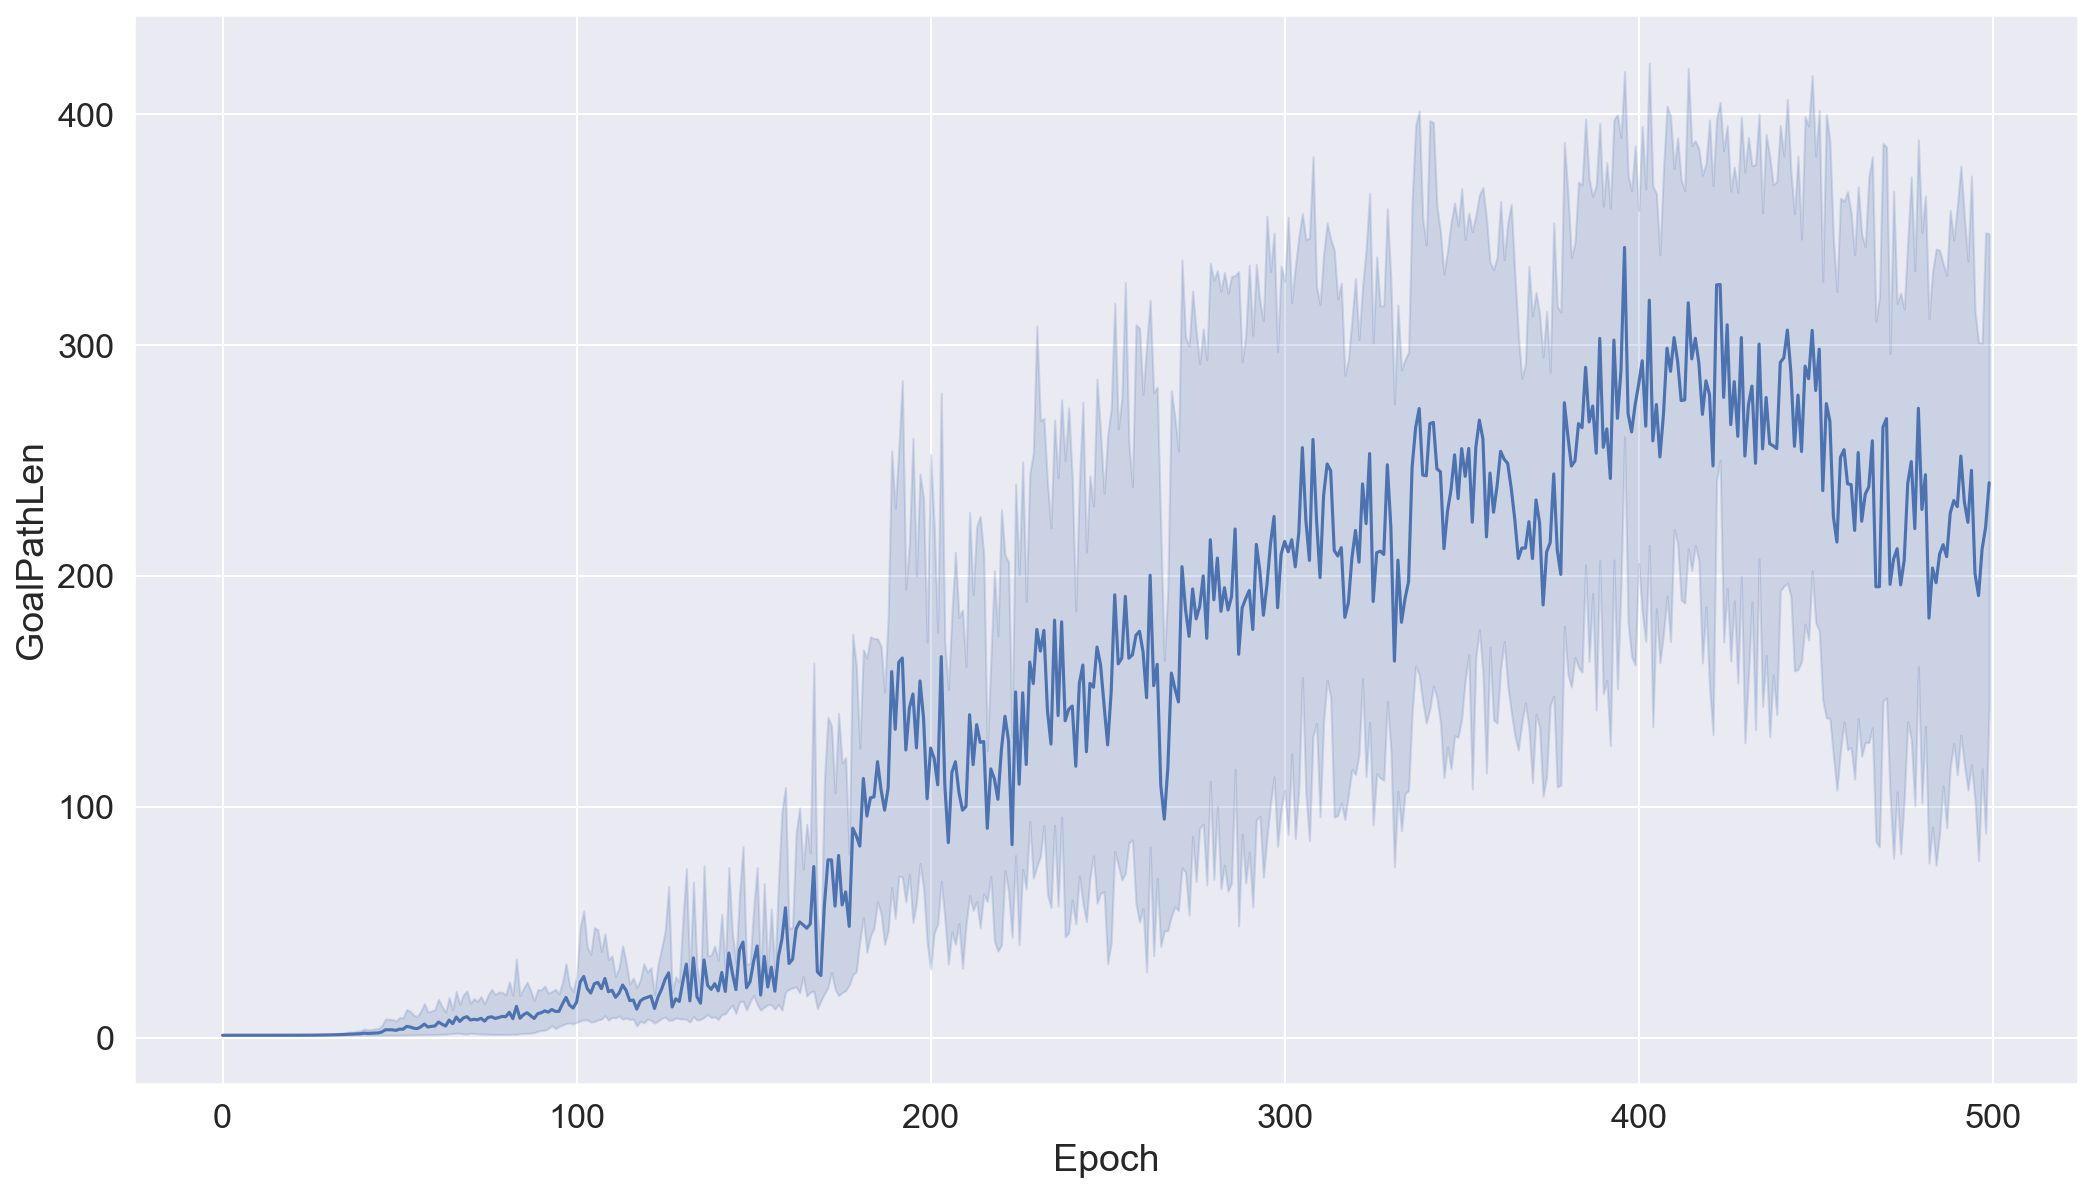

In [11]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()

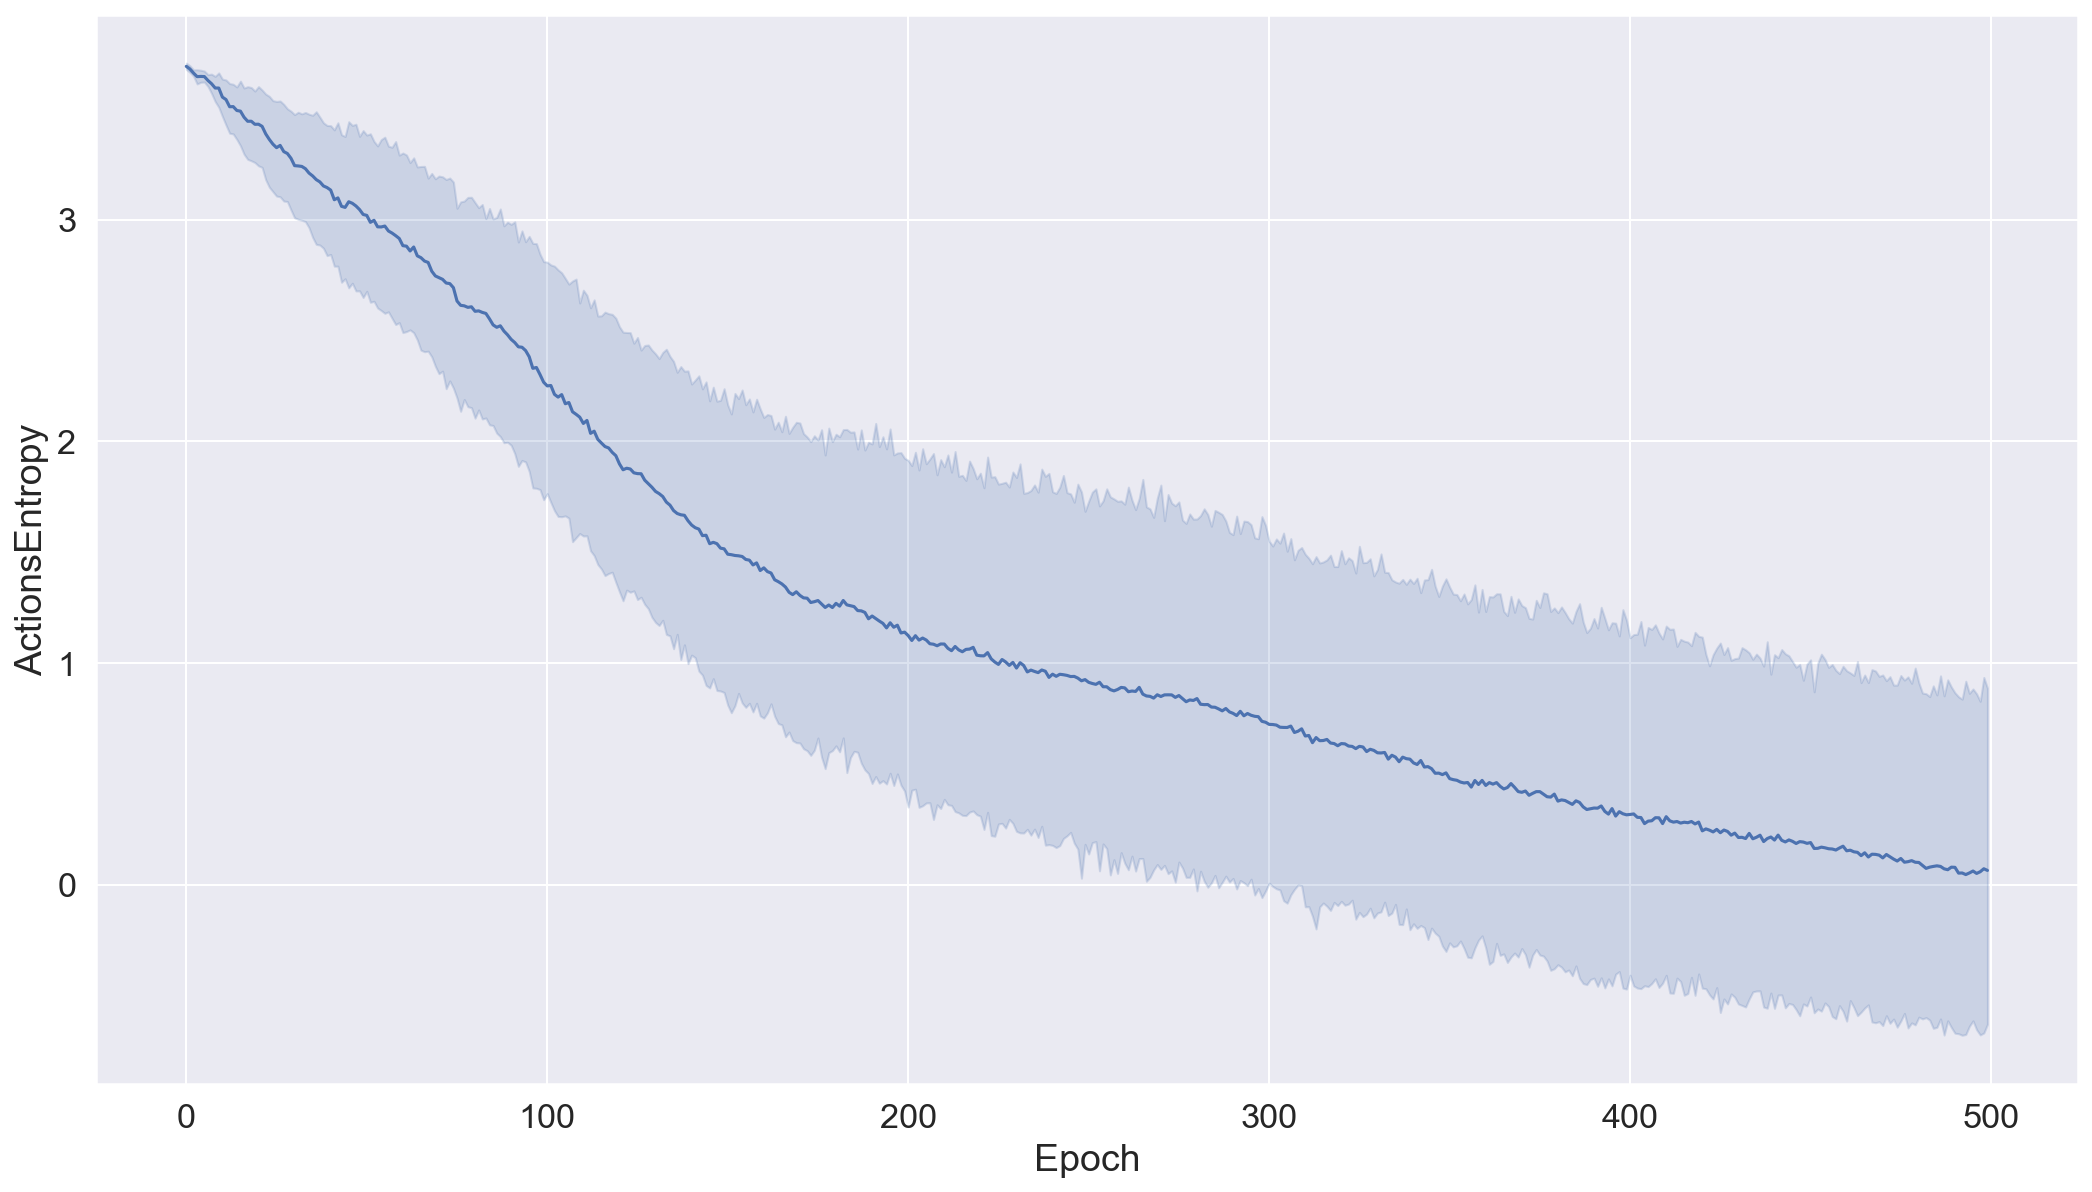

In [12]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

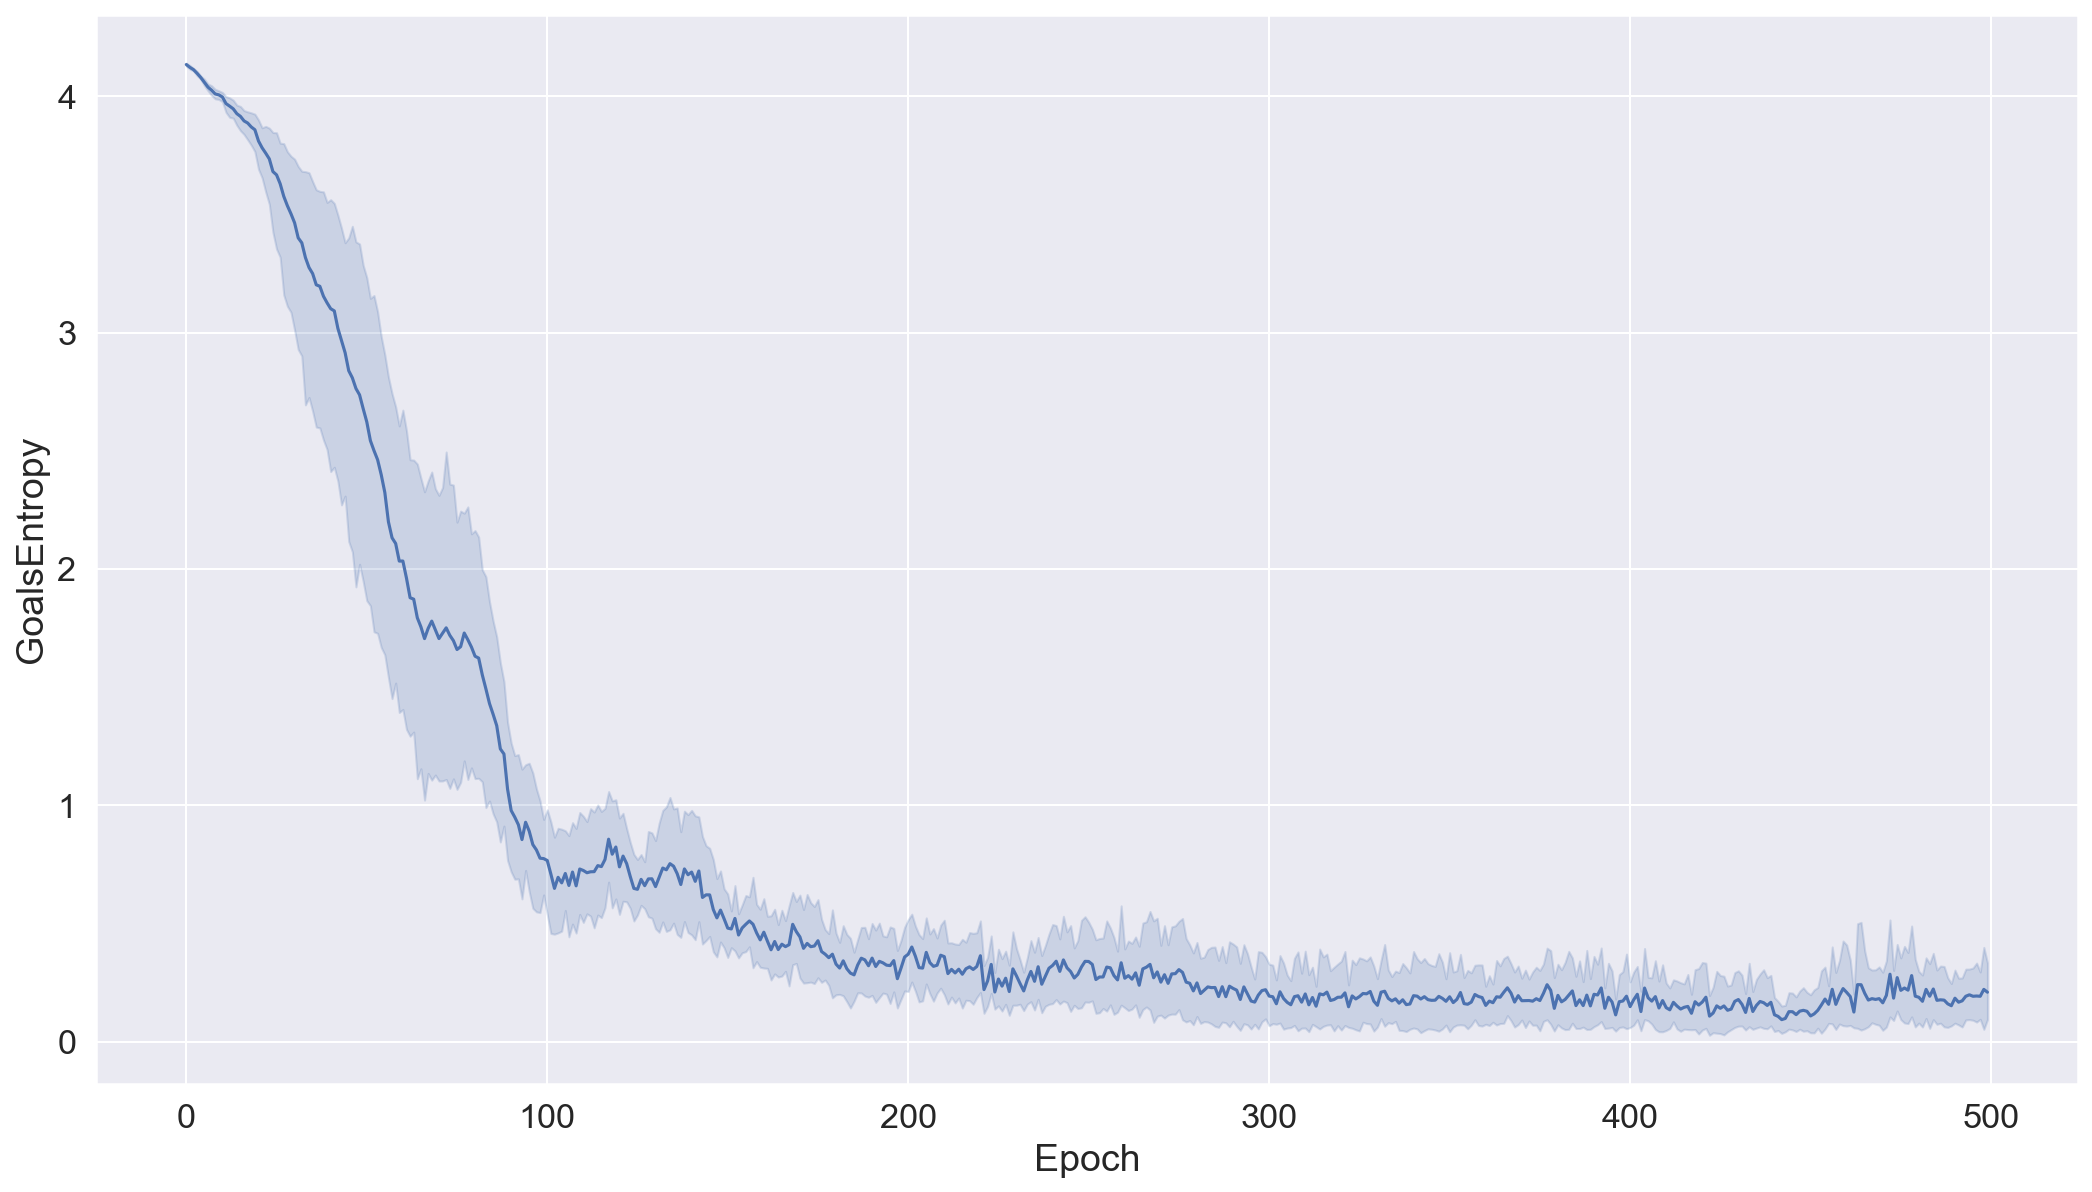

In [13]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()